In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
emdat_data = pd.read_excel("data/public_emdat_incl_hist_2024-03-26.xlsx")

In [4]:
emdat_data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

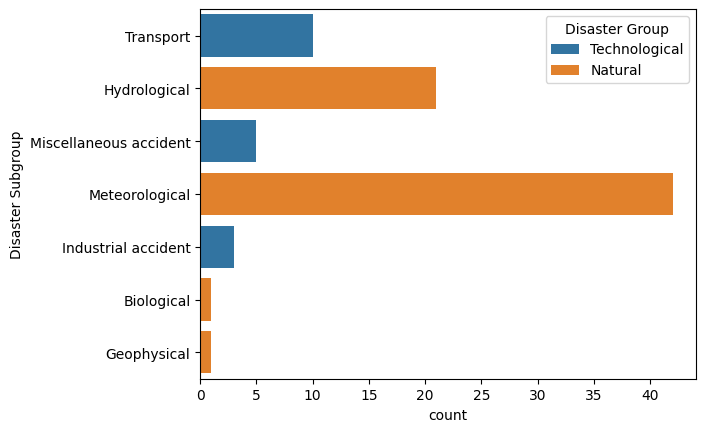

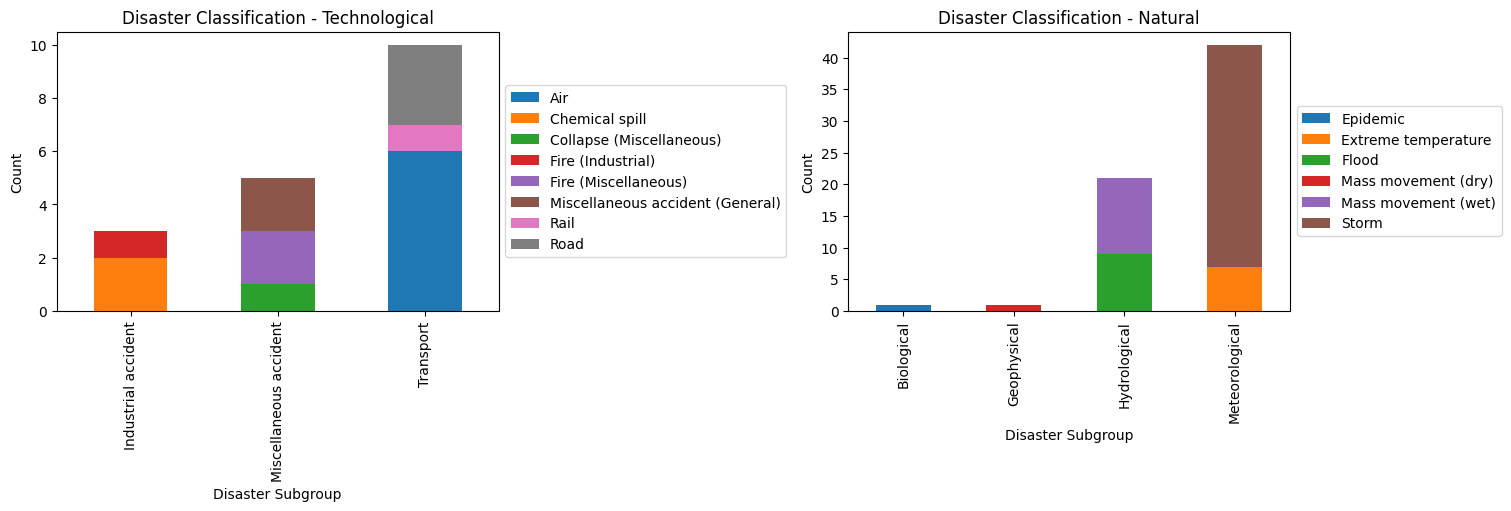

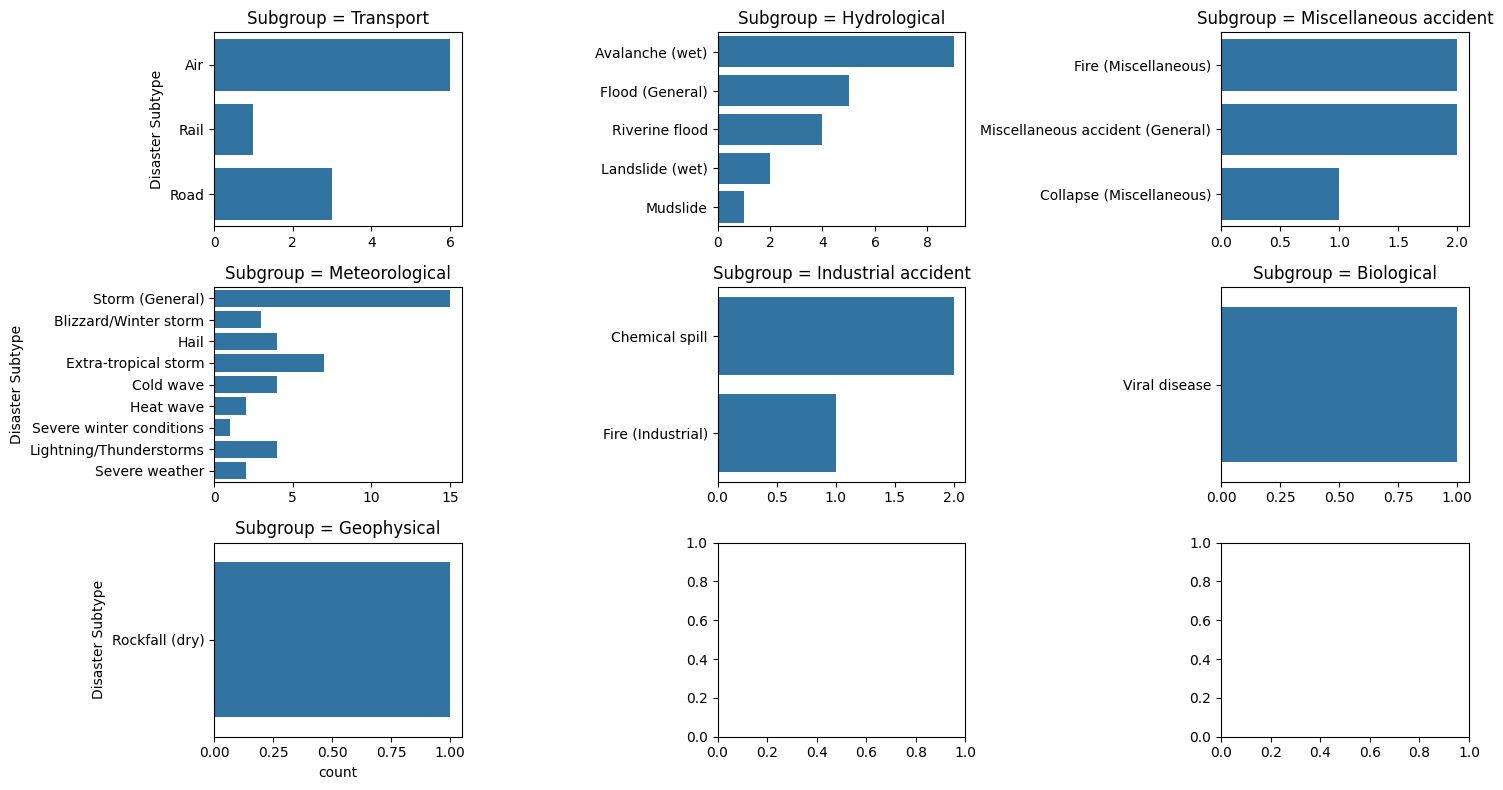

In [13]:
v = emdat_data[emdat_data["Country"] == "Switzerland"]

sns.countplot(v, y="Disaster Subgroup", hue="Disaster Group")

import matplotlib.pyplot as plt

# Get unique 'Disaster Group' values
disaster_groups = v['Disaster Group'].unique()

# Determine the layout of the subplots
n = len(disaster_groups)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a subplot for each 'Disaster Group'
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5), constrained_layout=True)

for ax, group in zip(axes.flatten(), disaster_groups):
    grouped = v[v['Disaster Group'] == group].groupby(['Disaster Subgroup', 'Disaster Type']).size().unstack()
    grouped.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(f'Disaster Classification - {group}')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove empty subplots
if len(disaster_groups) < nrows*ncols:
    for idx in range(len(disaster_groups), nrows*ncols):
        fig.delaxes(axes.flatten()[idx])

plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
for i, (ax, disaster_subgroup) in enumerate(zip(axes.flatten(), v["Disaster Subgroup"].dropna().unique())):
    sns.countplot(
        v[v["Disaster Subgroup"]==disaster_subgroup],
        y="Disaster Subtype",
        legend=False,
        ax=ax,
    )
    if i % 3 != 0:
        ax.set_ylabel("")
    if i < 6:
        ax.set_xlabel("")
    ax.set_title(f"Subgroup = {disaster_subgroup}")
plt.tight_layout()
plt.show()

# Origin values
Allow us to have acces to some type of text for some disasters type (the origin of the disaster), they are quite unique for each case without a lot of repetions...
Only 889 different origin name for a total of 4390 NOT nan

In [77]:
print(len(emdat_data["Origin"].dropna()))
emdat_data["Origin"].dropna().unique()

4390


array(['Earthquake', 'Violent storm', 'Meteorological',
       'Volacno and landslide', 'Collapse of bridges',
       'Storm and wave surge', 'Late arrival of rain',
       'Erreur aiguillage', 'Fire', 'Typhoon', 'Heavy rains',
       'Earthquake and landslide', 'Landslide', 'Heavy rain', 'Famine',
       'El Nino', 'Explosion during refueling', 'Short circuit',
       'Brief torrential rains', 'Gas leak', 'Monsoon rain',
       'Collision with a bus', 'Brief torrential rain', 'Drought period',
       'Rain, snowmelt', 'Monsoonal rain', 'Tropical cyclone',
       'Extra-tropical cyclone', 'Heavy rains and thunderstorms',
       'Prolonged drought', 'Monsoon rains',
       'Volcanic activity, tropical rainstorms and ash from the eruptions',
       'Monssonal rain', 'monsoonal rain', 'Heavy rains, tremor',
       'Snowmelt and Heavy rains', 'Heavy rain and Snowmelt', 'Snowmelt',
       'Hevay rain', 'Snow storm and heavy winds',
       'Heavy rains, melting snow', 'Rain and snowmelt',
  

In [80]:
# Group by 'Disaster Subgroup' and 'Disaster Type', then filter groups to only include those with at least one non-NaN 'Origin'
grouped = emdat_data.groupby(['Disaster Subgroup', 'Disaster Type'])
filtered_groups = grouped.filter(lambda x: x['Origin'].notna().any())

# Count occurrences of each unique origin for each disaster subgroup and type
origin_counts = filtered_groups.groupby(['Disaster Subgroup', 'Disaster Type', 'Origin']).size()

# Filter out categories with zero origin values
filtered_origin_counts = origin_counts[origin_counts > 0]
print(len(filtered_origin_counts))

# Sort the origin_counts in descending order to get the most frequent origins
sorted_origin_counts = filtered_origin_counts.groupby(level=['Disaster Subgroup', 'Disaster Type']).nlargest(4)

sorted_origin_counts.to_csv('origin.csv')
print(sorted_origin_counts)

889
Disaster Subgroup  Disaster Type        Disaster Subgroup  Disaster Type        Origin                                   
Meteorological     Storm                Meteorological     Storm                Heavy rains                                  7
                                                                                Heavy rain                                   5
                                                                                Torrential rains                             4
                                                                                Strong winds                                 3
                   Extreme temperature  Meteorological     Extreme temperature  Polar air mass flow                          2
                                                                                                                            ..
Transport          Air                  Transport          Air                  Collision                       

C:\Users\david\AppData\Local\Temp\ipykernel_8268\1518624526.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = emdat_data.groupby(['Disaster Subgroup', 'Disaster Type'])
C:\Users\david\AppData\Local\Temp\ipykernel_8268\1518624526.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = filtered_groups.groupby(['Disaster Subgroup', 'Disaster Type', 'Origin']).size()
C:\Users\david\AppData\Local\Temp\ipykernel_8268\1518624526.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

# Disaster types

<Axes: xlabel='count', ylabel='Disaster Subgroup'>

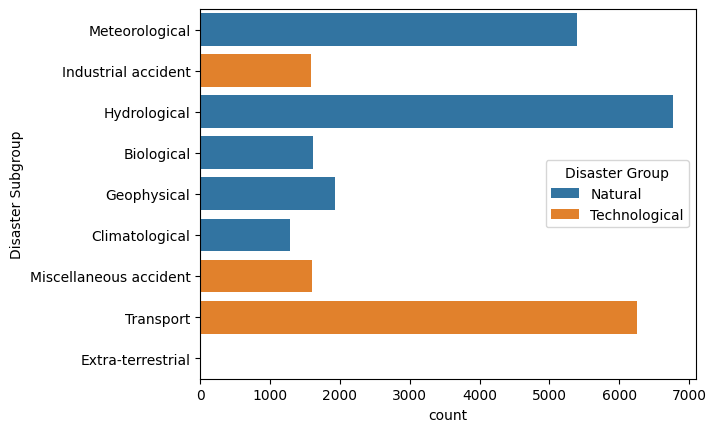

In [ ]:
sns.countplot(emdat_data, y="Disaster Subgroup", hue="Disaster Group")

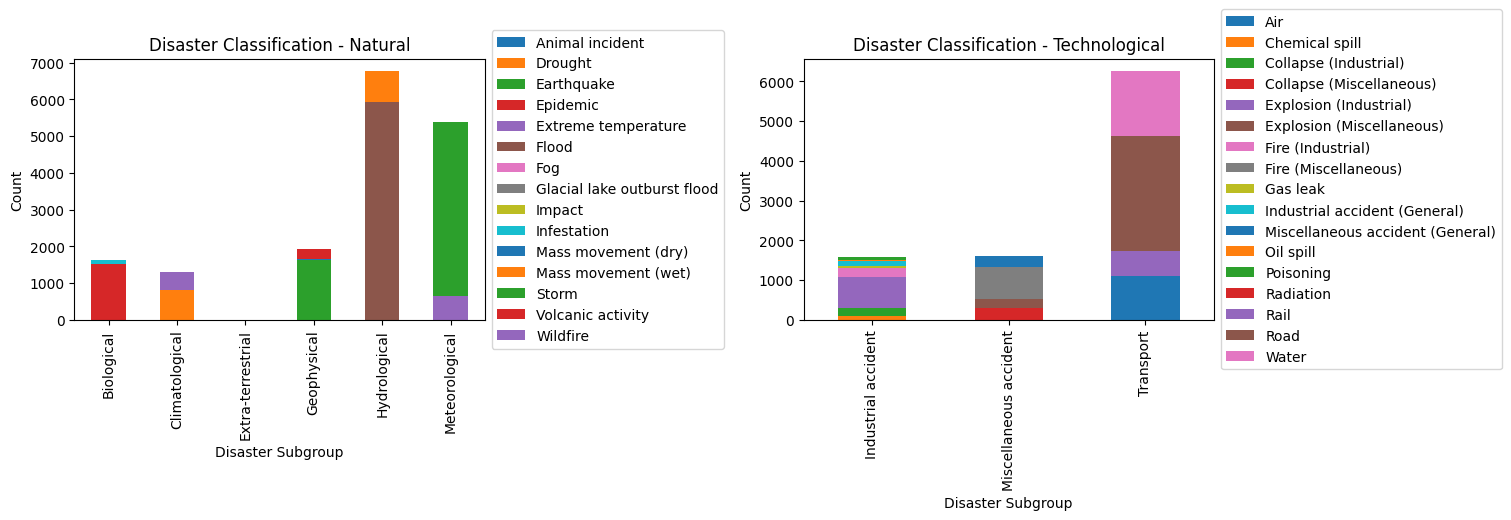

In [18]:
import matplotlib.pyplot as plt

# Get unique 'Disaster Group' values
disaster_groups = emdat_data['Disaster Group'].unique()

# Determine the layout of the subplots
n = len(disaster_groups)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a subplot for each 'Disaster Group'
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5), constrained_layout=True)

for ax, group in zip(axes.flatten(), disaster_groups):
    grouped = emdat_data[emdat_data['Disaster Group'] == group].groupby(['Disaster Subgroup', 'Disaster Type']).size().unstack()
    grouped.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(f'Disaster Classification - {group}')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove empty subplots
if len(disaster_groups) < nrows*ncols:
    for idx in range(len(disaster_groups), nrows*ncols):
        fig.delaxes(axes.flatten()[idx])

plt.show()

# Relationship
List of secondary disaster types cascading from or co-occurring aside from the main type
Smt the associated disater also correspond to a type of main disaster
One MAIN disasters can have multiples asociated disaters (that is why I split)

**could be useful to make a grahp style visualization**

In [110]:
a = emdat_data["Associated Types"].dropna()
# separate the values in the 'Associated Types' column by "|"
a = a.str.split("|", expand=True)
# count the unique values in total of all columns
a = a.stack().value_counts()
a

Slide (land, mud, snow, rock)    1676
Flood                            1047
Hail                              241
Rain                              214
Tsunami/Tidal wave                183
Food shortage                     172
Broken Dam/Burst bank             171
Lightening                        112
Storm                             107
Cold wave                          92
Snow/ice                           83
Famine                             74
Transport accident                 70
Heat wave                          65
Surge                              65
Fire                               59
Wildfire                           30
Water shortage                     25
Drought                            25
Collapse                           24
Pollution                          17
Avalanche (Snow, Debris)           15
Crop failure                       15
Explosion                          13
Industrial accidents               10
Oil spill                           9
Earthquake  

In [111]:
# Get unique disaster types from the dataset
unique_disaster_types = emdat_data["Disaster Type"].unique()

# Create an empty dictionary to store the results for each disaster type
associated_type_counts_per_disaster_type = {}

# Iterate over each disaster type
for disaster_type in unique_disaster_types:
    # Filter the original dataset by the current disaster type
    filtered_data = emdat_data[emdat_data["Disaster Type"] == disaster_type]
    
    # Drop NaN values and split values in the 'Associated Types' column by "|"
    associated_types = filtered_data["Associated Types"].dropna().str.split("|", expand=True)
    
    # Stack the DataFrame to reshape it and count the unique values
    associated_type_counts = associated_types.stack().value_counts()
    
    # Store the result for the current disaster type in the dictionary
    associated_type_counts_per_disaster_type[disaster_type] = associated_type_counts

# Display the result for each disaster type
for disaster_type, counts in associated_type_counts_per_disaster_type.items():
    print(f"Disaster Type: {disaster_type}")
    print(counts)
    print()


Disaster Type: Storm
Flood                            971
Slide (land, mud, snow, rock)    372
Hail                             223
Rain                              97
Cold wave                         72
Surge                             63
Lightening                        51
Transport accident                47
Snow/ice                          23
Avalanche (Snow, Debris)          13
Broken Dam/Burst bank             10
Fire                               5
Tsunami/Tidal wave                 3
Oil spill                          2
Storm                              2
Wildfire                           1
Industrial accidents               1
Name: count, dtype: int64

Disaster Type: Fire (Industrial)
Explosion    5
Name: count, dtype: int64

Disaster Type: Flood
Slide (land, mud, snow, rock)    1095
Broken Dam/Burst bank             158
Rain                              107
Storm                              96
Lightening                         59
Hail                               18